In [1]:
import numpy as np
from catboost import CatBoostClassifier, datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
import re

def to_float_str(element):
    try:
        return str(float(element))
    except ValueError:
        return element



def get_dataset(target):
    targets = pd.read_csv(f'kdd/{target}.labels', names=['target'])['target']
    targets = targets.apply(lambda x: 1 if x == 1 else 0)
    data = pd.read_csv('kdd/kdd.data', sep='\t')
    data[target] = targets
    targets = data[target]
    data.drop([target], axis=1, inplace=True)
    
    categorical_features = {
        190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
    }

    for i in categorical_features:
        data[data.columns[i]].fillna("?", inplace=True)
        data[data.columns[i]] = data[data.columns[i]].apply(lambda x: to_float_str(x))


    columns_to_impute = []
    for i, column in enumerate(data.columns):
        if i not in categorical_features and pd.isnull(data[column]).any():
            columns_to_impute.append(column)
    for column_name in columns_to_impute:
        data[column_name + "_imputed"] = pd.isnull(data[column_name]).astype(float)
        data[column_name].fillna(0, inplace=True)

    return data, targets, [data.columns[x] for x in categorical_features]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


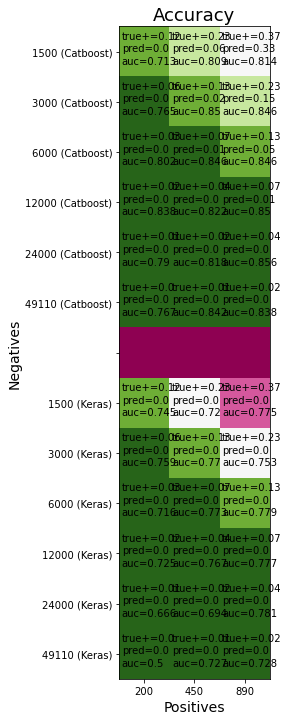

In [3]:
from base_experiment import BaseExperiment

class AppetencyExperiment(BaseExperiment):
    POSITIVE_STEPS =[200, 450, 890]
    NEGATIVE_STEPS = [1500, 3000, 6000, 12000, 24000, 49110]

    def get_dataset(self):
        return get_dataset('appetency')
    
    def get_keras_model(self):
        return keras.Sequential([
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    
AppetencyExperiment().run()

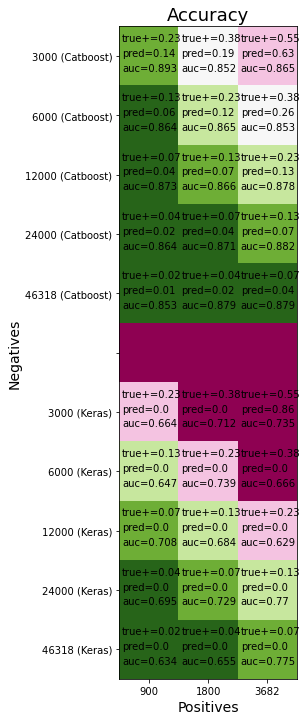

In [4]:
from base_experiment import BaseExperiment

class UpsellingExperiment(BaseExperiment):
    POSITIVE_STEPS = [900, 1800, 3682]
    NEGATIVE_STEPS = [3000, 6000, 12000, 24000, 46318]

    def get_dataset(self):
        return get_dataset('upselling')
    
    def get_keras_model(self):
        return keras.Sequential([
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1, activation='sigmoid'),
        ])
    
UpsellingExperiment().run()